# Soal 1: Pemahaman Teori
Jelaskan perbedaan antara Univariate, Bivariate dan Multivariate Analysis 

Univariate analysis adalah sebuah teknik dalam memahami dan melakukan eksplorasi data pada data feature tunggal. Bivariate analysis adalah sebuah teknik untuk menganalisa 2 variabel dan menemukan sebuah relasi menggunakan koefisien korelasi. Multivariate analysis adalah sebuah teknik untuk menganalisa lebih dari 2 variabel sehingga akan membantu untuk memahami data mana yang memiliki tren yang kompleks pada kombinasi atribut.



---



---



---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB




---



---



---



# Soal 2. Persiapan Data

*   Hapus nilai missing dalam rows dataset menggunakan atribut.dropna()

*   Lakukan grouping data berdasarkan kolom 'species' dengan menggunakan agregasi mean()



In [4]:
df.dropna(axis = 0, how = 'any', inplace = True)
df2 = df.groupby('species').mean()
df2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


Expected output:

![tanpa handling missing value](https://drive.google.com/uc?id=1OnuXmscVRqduqT_TYI1vB291rpXM4D_1)


# Soal 3. Univariate Analysis
Buatlah sebuah analisa univariate dengan menggunakan perintah seperti berikut:

*   Buatlah sebuah Pie plot dari dataset hasil grouping untuk kolom flipper_length_mm seperti expected output berikut:
*   Buatlah sebuah plot histogram dari dataset awal (sebelum grouping) untuk kolom body_mass_g
*   Jelaskan insight yang diperoleh dari ke dua grafik tersebut.





Pie Chart


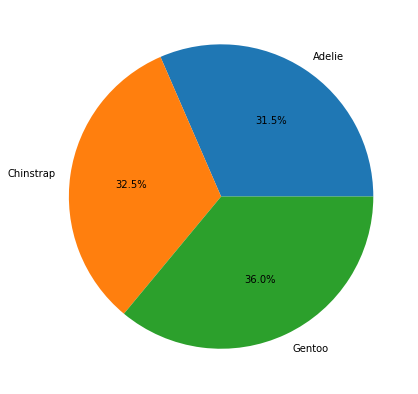

Histogram


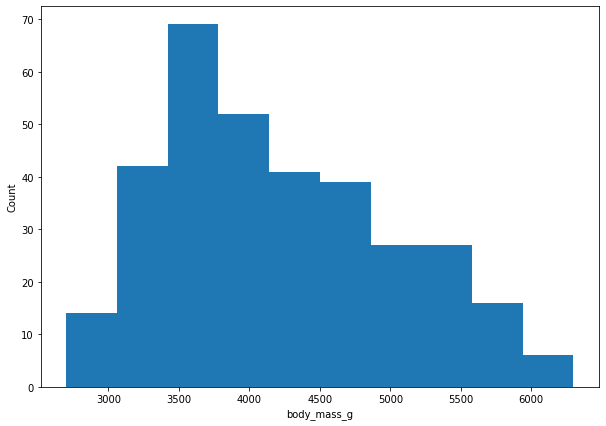

In [8]:
print('Pie Chart')
plt.figure(figsize = (10, 7))
plt.pie(df2['flipper_length_mm'], labels = df2.index, autopct = '%1.1f%%')
plt.show()

print('Histogram')
plt.figure(figsize = (10, 7))
plt.hist(df['body_mass_g'], bins = 10)
plt.xlabel('body_mass_g')
plt.ylabel('Count')
plt.show()

Expected Output:


Pie Chart

![](https://drive.google.com/uc?id=11H6X7xpEeodPWD56tHBhV4sLrJ-6B-Bd)

Histogram

![](https://drive.google.com/uc?id=1A_twS7BbQhkGvUz7zAWgye7q3ZRTQkhi)

Analisa:
Penguin jenis Gentoo lebih banyak dari pada jenis yang lainnya, yaitu sebesar 36.0 %. Body mass penguin berkisar antara 3000 sampai 6000, dengan berat yang didominasi dari 3500 sampai 4000.



---



---



---



# Soal 4. Bivariate Analysis



*   Buatlah sebuah grafik catplot menggunakan seaborn dengan x='sex', y='bill_length_mm' dan kind 'bar' seperti expected output di bawah
*   Buatlah sebuah grafik scatter plot menggunakan seaborn dengan x='body_mass_g', y='flipper_length_mm', hue='bill_length_mm' seperti expected dibawah
*   Jelaskan insight yang diperoleh dari hasil analisa bivariate tersebut






Catplot


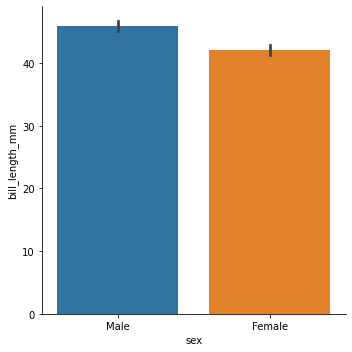

Scatter plot


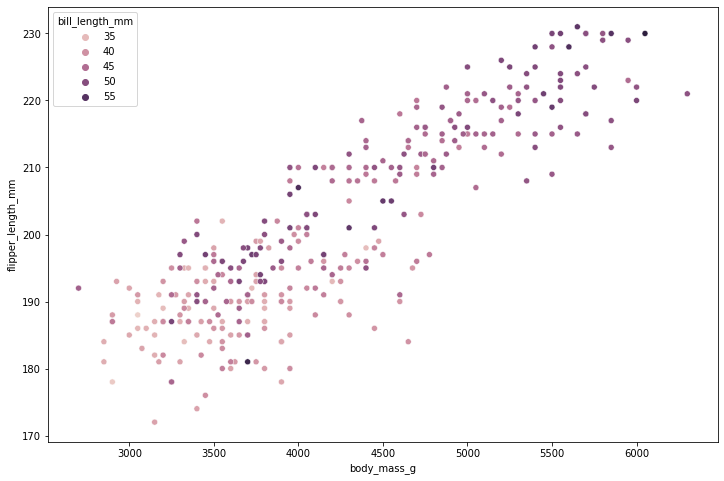

In [9]:
print('Catplot')
sns.catplot(x = 'sex', y = 'bill_length_mm', data = df, kind = 'bar')
plt.show()

print('Scatter plot')
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'body_mass_g', y = 'flipper_length_mm', data = df, hue = 'bill_length_mm')
plt.show()

Expected Output:

Catplot

![](https://drive.google.com/uc?id=1imCbGD9cWqXUjd33tAh6D0OH20vVpWea)

Scatter plot

![](https://drive.google.com/uc?id=1_k734IpRYq6Q1wF57hwzSEjnVd2Sii2Z)

Analisa: Penguin dengan sex male memiliki bill length yang lebih panjang dari pada penguin dengan sex female. Semakin berat body mass penguin, maka semakin panjang juga flipper dan bill nya, sehingga hubungan antara body mass dan flipper length adalah positif dan linear.



---



---



---



# Soal 5. Multivariate Analisis

*   Dengan menggunakan seaborn, buatlah sebuah pairplot keseluruhan data feature pada dataset (df) dengan argumen kind='bar', seperti expected di bawah:
*   Jelaskan hasil analisa dari multivariate yang dihasilkan



Pair plot


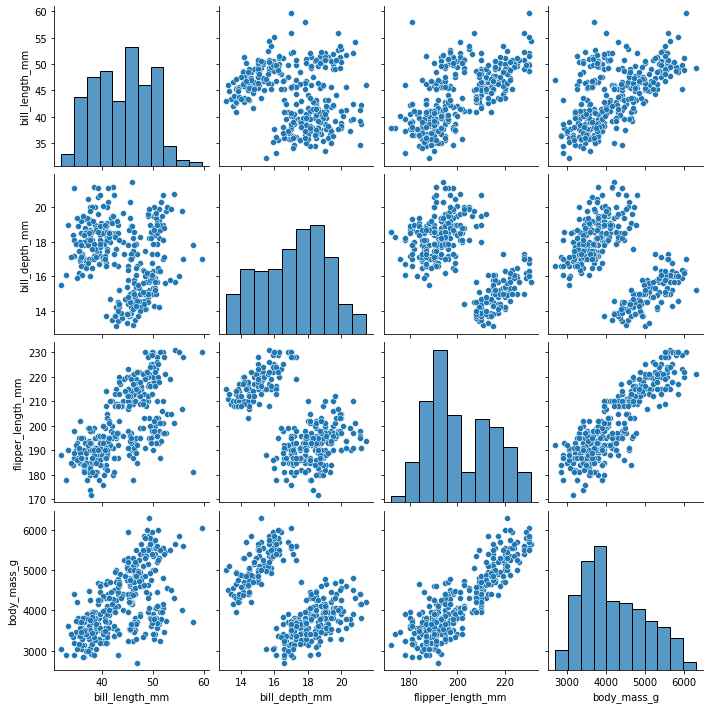

In [11]:
print('Pair plot')
sns.pairplot(data = df)
plt.show()

Expected output:

Pair plot

![](https://drive.google.com/uc?id=1td8WAZLJEW5BPTq-wEJyZ4soRNNLXfqX)

Analisa: Hubungan antara body mass dengan bill length, bill depth, dan flipper length menunjukkan korelasi positif dan linear. Jika body mass bertambah, maka bill length, bill depth, dan flipper length juga bertambah.



---



---



---

